<a href="https://colab.research.google.com/github/user-156/nextback/blob/master/colabTest/VGG_16_GC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG-16 MODEL

In [9]:
from __future__ import print_function
import json
import keras
import pickle
import os.path
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras import optimizers
from keras import regularizers
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input
from keras.layers import add
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Load DataSet

In [10]:
# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

# Prepare Pixel Data

In [14]:
#We know that the pixel values for each image in the dataset are unsigned integers in the range
#between black and white, or 0 and 255. We do not know the best way to scale the pixel values
#for modeling, but we know that some scaling will be required. A good starting point is to
#normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves
#first converting the data type from unsigned integers to floats, then dividing the pixel values by
#the maximum value.
# scale pixels
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype( 'float32' )
  test_norm = test.astype( 'float32' )
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

# Define The Model

In [15]:
# define cnn model
def define_model():
  model = Sequential()

  model.add(Conv2D(64, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' , input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(128, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(256, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(512, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(256, activation= 'relu' , kernel_initializer= 'he_uniform' ))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(128, activation= 'relu' , kernel_initializer= 'he_uniform' ))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(10, activation= 'softmax' ))

  # compile model
  # opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer='adam', loss= 'categorical_crossentropy' , metrics=[ 'accuracy' ])
  return model

In [16]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

# Model Architecture

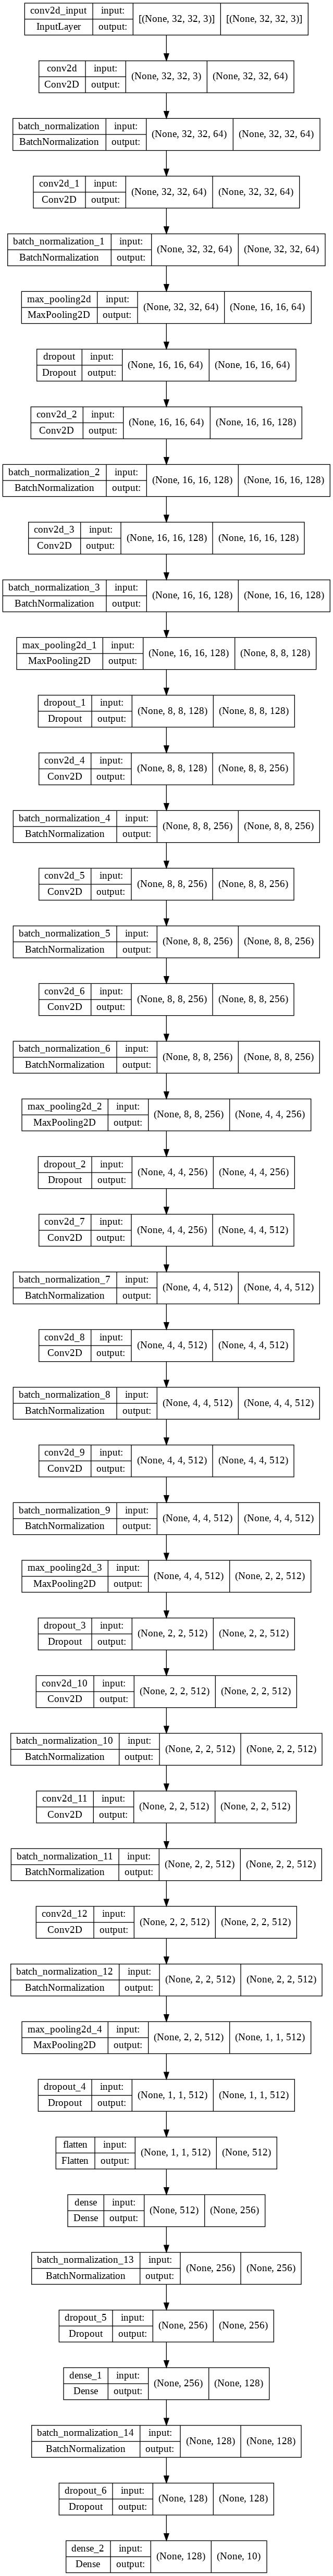

In [ ]:
# plot model architecture
plot_model(model, show_shapes=True, to_file= 'vgg_block.png' )

# Data Augmentation

In [ ]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)

# Train The Model

In [ ]:
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=70, validation_data=(testX,
testY), verbose=1)

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


781/781 [==============================] - 52s 48ms/step - loss: 2.0930 - accuracy: 0.2717 - val_loss: 1.6812 - val_accuracy: 0.4003
Epoch 2/70
781/781 [==============================] - 37s 47ms/step - loss: 1.4532 - accuracy: 0.4696 - val_loss: 1.4373 - val_accuracy: 0.5427
Epoch 3/70
781/781 [==============================] - 36s 46ms/step - loss: 1.1662 - accuracy: 0.5986 - val_loss: 1.2657 - val_accuracy: 0.6090
Epoch 4/70
781/781 [==============================] - 36s 46ms/step - loss: 0.9920 - accuracy: 0.6685 - val_loss: 1.0810 - val_accuracy: 0.6648
Epoch 5/70
781/781 [==============================] - 36s 46ms/step - loss: 0.8828 - accuracy: 0.7123 - val_loss: 1.1417 - val_accuracy: 0.6651
Epoch 6/70
781/781 [==============================] - 36s 46ms/step - loss: 0.7986 - accuracy: 0.7418 - val_loss: 0.7554 - val_accuracy: 0.7543
Epoch 7/70
781/781 [==============================] - 36s 46ms/step - loss: 0.7452 - accuracy: 0.7643 - val_loss: 0.8085 - val_accuracy: 0.7456
Epo

# Evaluate The Model

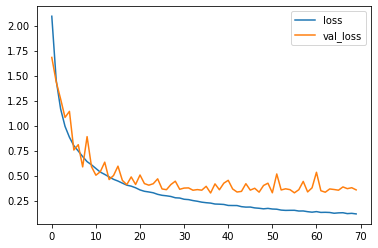

In [ ]:
# Plot loss per iteration
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

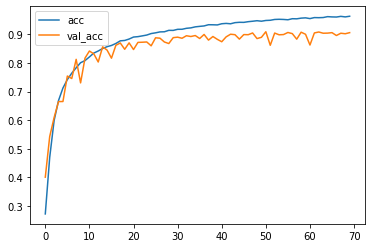

In [ ]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# evaluate model
_ , acc = model.evaluate(testX, testY, verbose=0)
print( ' > %.3f ' % (acc * 100.0))

 > 90.610 


# Confusion Matrix

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [ ]:
rounded_labels=np.argmax(testY, axis=1)

p_test = model.predict(testX).argmax(axis=1)
cm = confusion_matrix(rounded_labels, p_test)

Confusion matrix, without normalization
[[897   8  21  16   3   0   9   5  30  11]
 [  2 980   1   3   0   0   1   0   4   9]
 [ 18   0 875  29  19  27  20   7   3   2]
 [  8   1  21 834  12  75  27   7   5  10]
 [  2   1  20  33 905  12  19   7   1   0]
 [  4   2  19  92  19 849  11   4   0   0]
 [  5   1  14  22   1   2 953   1   1   0]
 [  5   0   6  19  25  27   3 912   0   3]
 [ 23  12   8   5   1   0   8   1 933   9]
 [  5  57   3   2   2   1   1   1   5 923]]


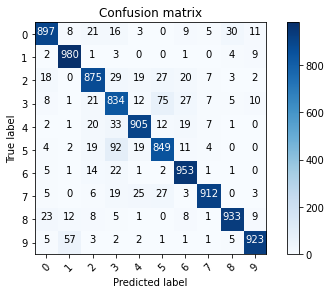

In [ ]:
plot_confusion_matrix(cm, list(range(10)))

# Test The Model

In [ ]:
# Label mapping
labels = '''Avion
Voiture
Oiseau
Chat
Cerf
Chien
Grenouille
Cheval
Bateau
Camion'''.split()

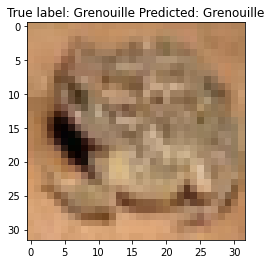

In [ ]:
# Show some classified examples
classified_idx = np.where(p_test == rounded_labels)[0]
i = np.random.choice(classified_idx)
plt.imshow(testX[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[rounded_labels[i]], labels[p_test[i]]));

# Save The Model

In [ ]:
# Save our model to a file
# Must save as a .h5 format to be able to download it to your pc
model.save('VggGC.h5')

In [ ]:
# Check that the model file exists
!ls -1h

sample_data
vgg_block.png
VggGC.h5


# Load the model

In [2]:
# Load the model
from tensorflow import keras
# We can do "tf.keras.models.load_model" to avoid importing Keras from tf
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/PFE Modules/SavedModels/VggGC.h5")

In [24]:
# evaluate model
_ , acc = reconstructed_model.evaluate(testX, testY, verbose=0)
print( ' > %.3f ' % (acc * 100.0))

 > 90.610 


In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [18]:
rounded_labels=np.argmax(testY, axis=1)

p_test = reconstructed_model.predict(testX).argmax(axis=1)
cm = confusion_matrix(rounded_labels, p_test)

313/313 [==============================] - 167s 524ms/step


Confusion matrix, without normalization
[[897   8  21  16   3   0   9   5  30  11]
 [  2 980   1   3   0   0   1   0   4   9]
 [ 18   0 875  29  19  27  20   7   3   2]
 [  8   1  21 834  12  75  27   7   5  10]
 [  2   1  20  33 905  12  19   7   1   0]
 [  4   2  19  92  19 849  11   4   0   0]
 [  5   1  14  22   1   2 953   1   1   0]
 [  5   0   6  19  25  27   3 912   0   3]
 [ 23  12   8   5   1   0   8   1 933   9]
 [  5  57   3   2   2   1   1   1   5 923]]


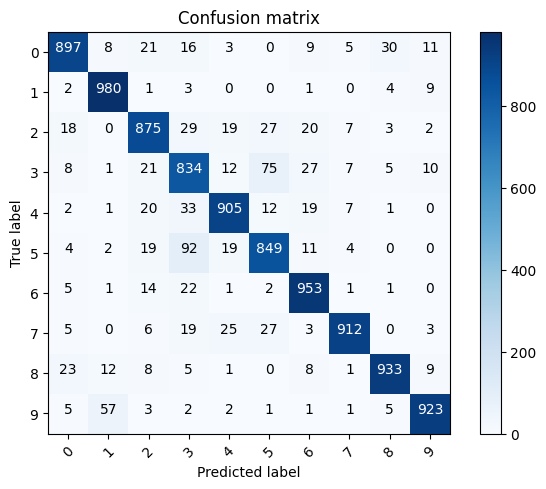

In [19]:
plot_confusion_matrix(cm, list(range(10)))

# Test The Model

In [20]:
# Label mapping
labels = '''Avion
Voiture
Oiseau
Chat
Cerf
Chien
Grenouille
Cheval
Bateau
Camion'''.split()

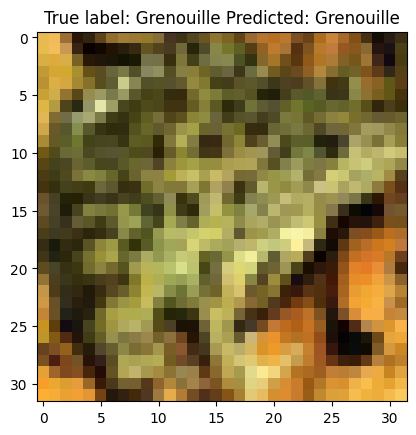

In [22]:
# Show some classified examples
classified_idx = np.where(p_test == rounded_labels)[0]
i = np.random.choice(classified_idx)
plt.imshow(testX[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[rounded_labels[i]], labels[p_test[i]]));